### Testing Model Assumptions Example 2.9
The Figure below displays the *scale location plot* for the **Advertising** data.

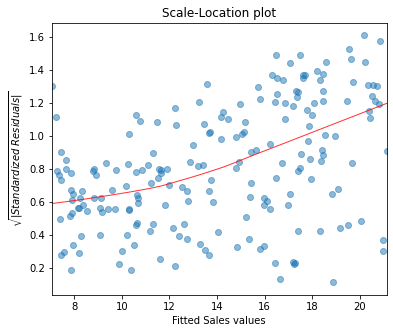

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Load data
df = pd.read_csv('./data/Advertising.csv')
x = df['TV']
y = df['sales']

# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
# Find the predicted values for the original design.
yfit = model.fittedvalues
# Residuals of the model
res = model.resid
# Influence of the Residuals
res_inf = model.get_influence()
# Studentized residuals using variance from OLS
res_standard = res_inf.resid_studentized_internal
# Absolute square root Residuals:
res_stand_sqrt = np.sqrt(np.abs(res_standard))

# Create Figure and subplots
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

# plot Square rooted Residuals
plt.scatter(yfit, res_stand_sqrt, alpha=0.5)
# plot Regression usung Seaborn
sns.regplot(x=yfit, y=res_stand_sqrt, 
            scatter=False, ci=False, lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax1.set_title('Scale-Location plot')
ax1.set_xlabel('Fitted Sales values')
ax1.set_ylabel('$\sqrt{\|Standardized\ Residuals\|}$')

# Show plot
plt.show()

We observe that the magnitude of the residuals tend to increase with the fitted values, indicating a non-constant variance of the error terms $\epsilon_{i}$. To test whether this deviation is due to a random variation or whether it is of systematic nature, we will run again simulations by resampling the data.

To see whether a deviating smoothing curve in a scale location plot may be related to a random effect, we run again simulations by sampling the data with replacement and by fitting smoothing curves on the basis of the resampled data. The Figure below displays a band of 100 simulated smoothing curves that were fitted on the basis of the resampled data.   
Since the (red) curve does not follow a path contained within this (grey) band of curves, we conclude that there is a systematic increase of the variances. 

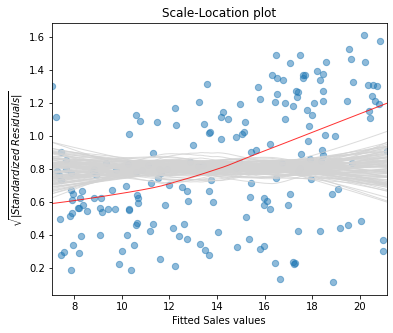

In [2]:
from TMA_def import plot_scale_loc

n_samp = 100   # Number of resamples

# Create Figure
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

# Plot Standardized Residuals using definition from TMA_def
plot_scale_loc(ax1, yfit, res_stand_sqrt, n_samp=100,
               x_lab="Fitted Sales values")

# Show plot
plt.show()    